In [162]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import lightgbm as lgb

In [128]:
train = pd.read_csv("train.csv", index_col=0)
test = pd.read_csv("test.csv", index_col=0)
submission = pd.read_csv("sample_submission.csv", index_col=0)

In [129]:
train

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
0,Male,28.0,0,0,Yes,Private,Urban,79.53,31.1,never smoked,0
1,Male,33.0,0,0,Yes,Private,Rural,78.44,23.9,formerly smoked,0
2,Female,42.0,0,0,Yes,Private,Rural,103.00,40.3,Unknown,0
3,Male,56.0,0,0,Yes,Private,Urban,64.87,28.8,never smoked,0
4,Female,24.0,0,0,No,Private,Rural,73.36,28.8,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...
15299,Female,22.0,0,0,No,Govt_job,Urban,72.63,19.5,never smoked,0
15300,Female,46.0,1,0,Yes,Private,Urban,101.19,32.1,never smoked,0
15301,Female,75.0,0,0,Yes,Self-employed,Urban,87.69,26.2,never smoked,0


In [130]:
train.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [131]:
test.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
dtype: int64

In [132]:
train['gender'].unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [133]:
train['gender'].value_counts()

Female    9446
Male      5857
Other        1
Name: gender, dtype: int64

In [134]:
train[train["gender"]=="Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
id,,,,,,,,,,,
9363,Other,9.0,0,0,No,children,Rural,96.04,18.0,Unknown,0


In [135]:
test[test["gender"]=="Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
id,,,,,,,,,,
19933,Other,56.0,0,0,Yes,Private,Urban,102.53,35.0,Unknown


In [136]:
train['hypertension'].unique()

array([0, 1])

In [137]:
train['hypertension'].value_counts()

0    14543
1      761
Name: hypertension, dtype: int64

In [138]:
train['heart_disease'].unique()

array([0, 1])

In [139]:
train['heart_disease'].value_counts()

0    14947
1      357
Name: heart_disease, dtype: int64

In [140]:
train['ever_married'].unique()

array(['Yes', 'No'], dtype=object)

In [141]:
train['ever_married'].value_counts()

Yes    10385
No      4919
Name: ever_married, dtype: int64

In [142]:
train['work_type'].unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [143]:
train['work_type'].value_counts()

Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: work_type, dtype: int64

In [144]:
train['Residence_type'].unique()

array(['Urban', 'Rural'], dtype=object)

In [145]:
train['Residence_type'].value_counts()

Rural    7664
Urban    7640
Name: Residence_type, dtype: int64

In [146]:
train['smoking_status'].unique()

array(['never smoked', 'formerly smoked', 'Unknown', 'smokes'],
      dtype=object)

In [147]:
train['smoking_status'].value_counts()

never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: smoking_status, dtype: int64

In [148]:
# map binary features (ever_married, Residence_type) to 0 and 1
train["married_ever"] = train["ever_married"].map({'No': 0, 'Yes': 1})
train["urban"] = train["Residence_type"].map({'Rural': 0, 'Urban': 1})
train = train.drop(['ever_married', "Residence_type"], axis = 1)

test["married_ever"] = test["ever_married"].map({'No': 0, 'Yes': 1})
test["urban"] = test["Residence_type"].map({'Rural': 0, 'Urban': 1})
test = test.drop(['ever_married', "Residence_type"], axis = 1)

In [151]:
# one-hot-encoding (gender, work_type, smoking_status)
train = pd.get_dummies(train)   
test = pd.get_dummies(test)

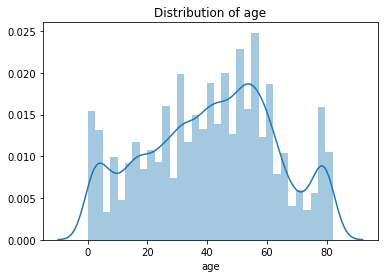

In [154]:
# plot distributions
sns.distplot(train['age']).set(title="Distribution of age");

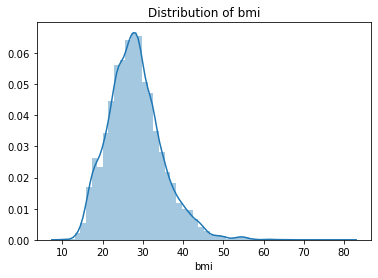

In [155]:
sns.distplot(train['bmi']).set(title="Distribution of bmi");

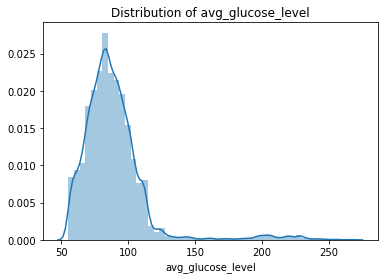

In [156]:
sns.distplot(train['avg_glucose_level']).set(title="Distribution of avg_glucose_level");

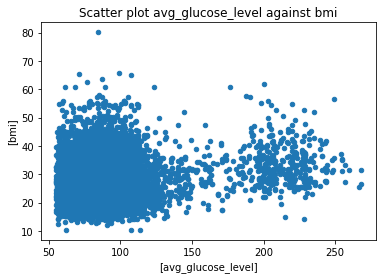

In [157]:
train.plot.scatter(x=["avg_glucose_level"], y=["bmi"], title='Scatter plot avg_glucose_level against bmi');

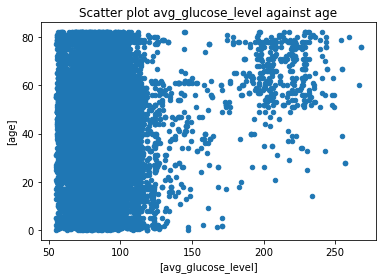

In [158]:
train.plot.scatter(x=["avg_glucose_level"], y=["age"], title='Scatter plot avg_glucose_level against age');

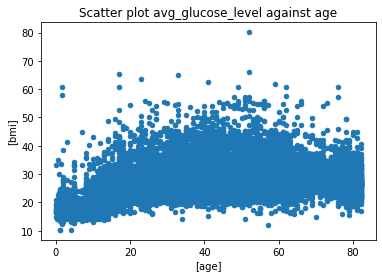

In [159]:
train.plot.scatter(x=["age"], y=["bmi"], title='Scatter plot avg_glucose_level against age');

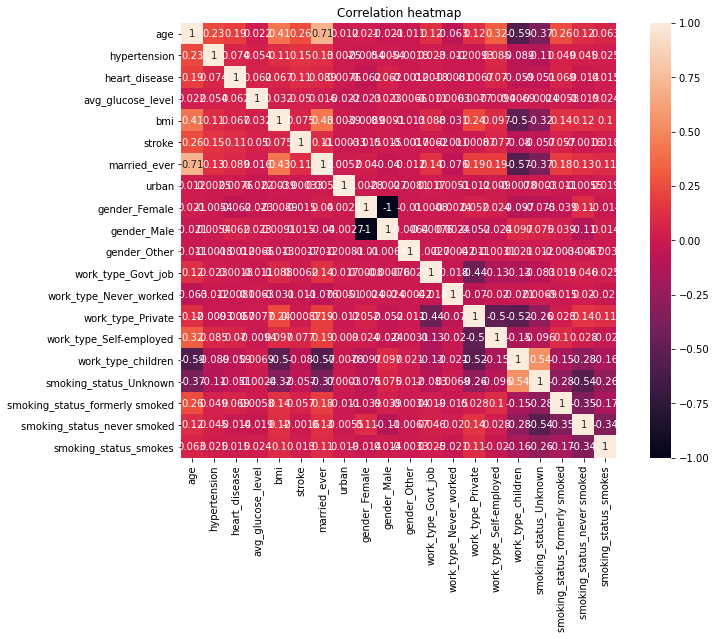

In [160]:
fig, ax = plt.subplots(figsize=(12,8)) 
corrmat = train.corr(method="spearman")
sns.heatmap(corrmat, square=True, annot=True, vmin = -1, vmax = 1, ax=ax).set(title='Correlation heatmap');

## Modeling

In [163]:
model1 = lgb.LGBMRegressor()
model1.fit(train.drop("stroke", axis=1), train["stroke"])

LGBMRegressor()

In [164]:
ypred1 = model1.predict(test)

In [165]:
ypred1

array([3.11637069e-02, 1.95800763e-01, 1.81028938e-03, ...,
       1.81028938e-03, 2.42097810e-03, 6.72490244e-06])

In [170]:
submission["stroke"] = ypred1

In [171]:
submission

,stroke
id,
15304,0.031164
15305,0.195801
15306,0.001810
15307,0.015300
15308,-0.000170
...,...
25503,0.001871
25504,0.012154
25505,0.001810


In [172]:
submission.to_csv("submission1.csv")